In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
match = pd.read_csv('..\Datasets\matches.csv')
delivery = pd.read_csv('..\Datasets\deliveries.csv')

In [86]:
delivery_with_match = pd.merge(delivery,match[['id','season']],left_on='match_id',right_on='id')
delivery_with_match.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
206955,1254113,2,Chennai Super Kings,Royal Challengers Bangalore,3,4,F du Plessis,PWH de Silva,RD Gaikwad,1,0,1,NaN,0,NaN,NaN,NaN,1254113,2021


In [87]:
team_performance = delivery_with_match.groupby(['season','batting_team'])['total_runs'].sum().reset_index()
team_performance.sample(5)

,season,batting_team,total_runs
105,2020/21,Rajasthan Royals,2288
80,2017,Mumbai Indians,2800
46,2013,Kolkata Knight Riders,2290
59,2014,Sunrisers Hyderabad,2102
55,2014,Kolkata Knight Riders,2499


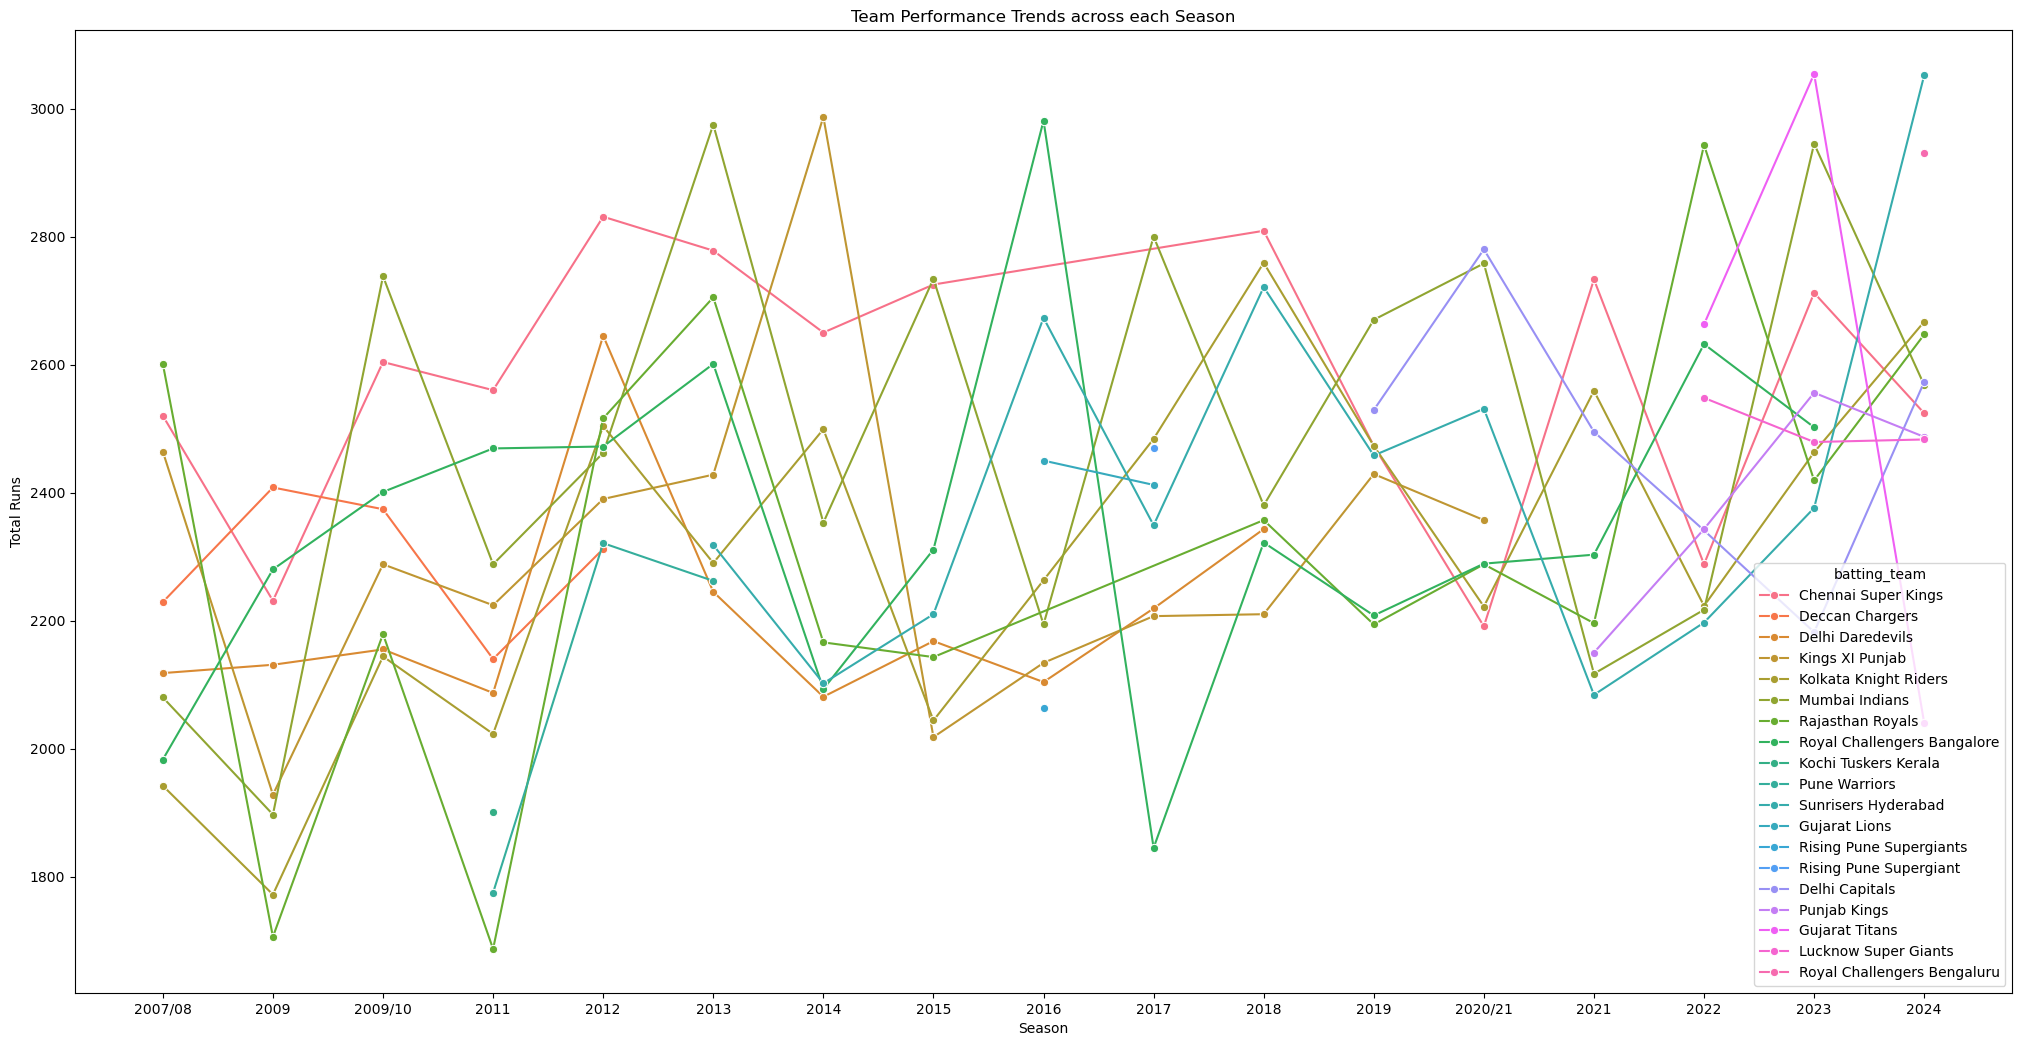

In [88]:
plt.figure(figsize=(25,12.5))
sns.lineplot(data=team_performance,x='season',y='total_runs',hue='batting_team',marker='o')
plt.title('Team Performance Trends across each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()

In [93]:
rcb_data = team_performance.loc[
    (team_performance['batting_team']=='Royal Challengers Bengaluru') |
    (team_performance['batting_team']=='Royal Challengers Bangalore')
]
csk_data = team_performance[team_performance['batting_team']=='Chennai Super Kings']

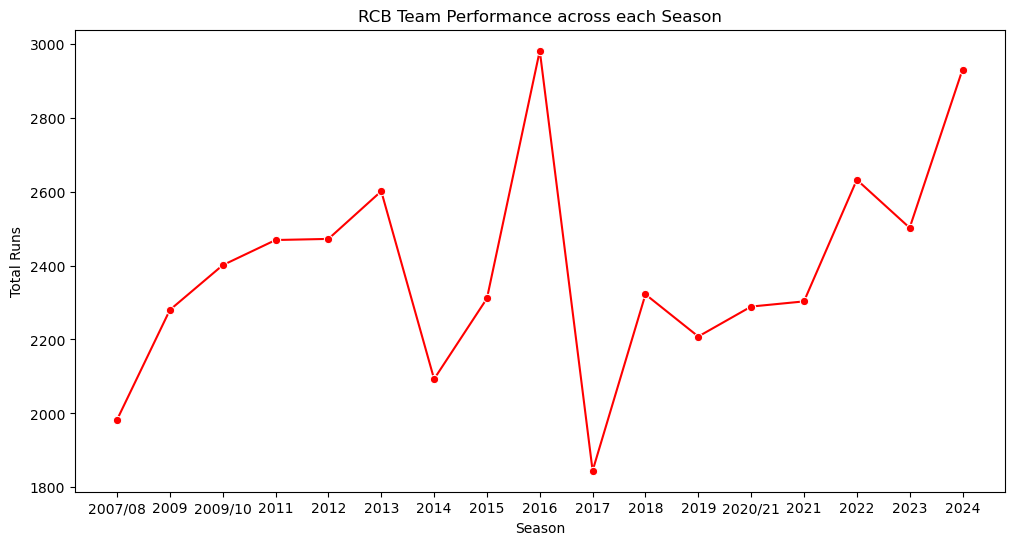

In [94]:
#PLot for RCB

plt.figure(figsize=(12,6))
sns.lineplot(data=rcb_data,x='season',y='total_runs',color='red',marker='o')
plt.title('RCB Team Performance across each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()

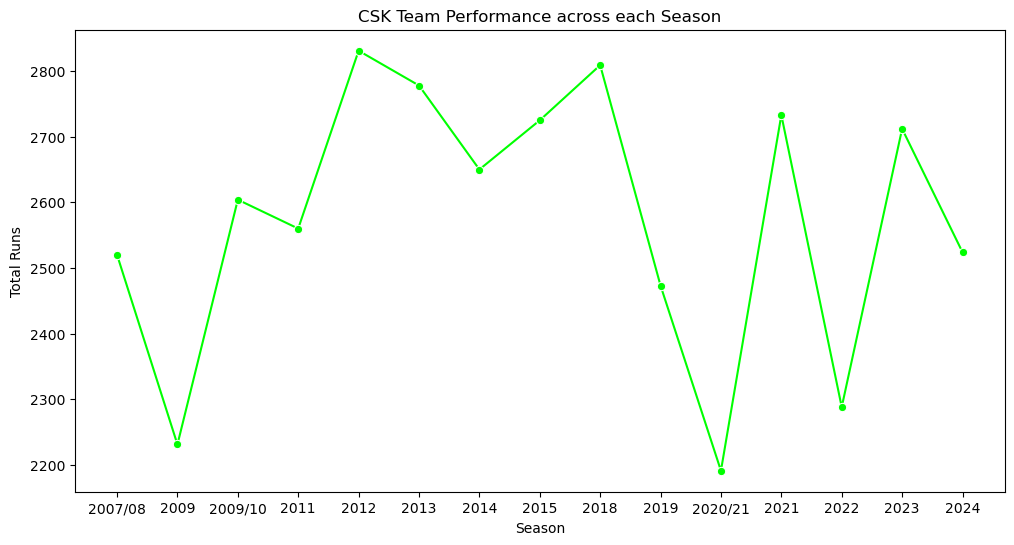

In [95]:
#Plot for CSK
plt.figure(figsize=(12,6))
sns.lineplot(data=csk_data,x='season',y='total_runs',color='lime',marker='o')
plt.title('CSK Team Performance across each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.show()